<a href="https://colab.research.google.com/github/a-desai7/DrowsyDetect/blob/main/DrowsyDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

# Accessing My Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Unzipping image folder
!unzip drive/My\ Drive/Apply\ AI/mrlEyes_2018_01.zip > /dev/null

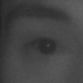

In [ ]:
# Display one image
img = tf.keras.preprocessing.image.load_img('mrlEyes_2018_01/s0001/s0001_02334_0_0_1_0_0_01.png')
img

Preprocessing (image resizing)

In [ ]:
# Loading in all 89k images

# Set the path to the directory containing the subfolders
root_dir = 'mrlEyes_2018_01/'

# Initialize an empty list to store the images
images = []

# Loop through each subfolder in the directory
for subdir in sorted(os.listdir(root_dir)):
    subfolder_path = os.path.join(root_dir, subdir)
    # Check if the path is a directory
    if os.path.isdir(subfolder_path):
        # Loop through each file in the subfolder
        for file in sorted(os.listdir(subfolder_path)):
            # Check if the file is a PNG image
            if file.endswith('.png'):
                # Open the image using the Pillow library
                img_path = os.path.join(subfolder_path, file)
                with Image.open(img_path) as img:
                    # Resize the image using TensorFlow and append it to the list
                    img_array = tf.keras.preprocessing.image.load_img(img_path, target_size=(80, 80))
                    images.append(np.asarray(img_array))

# Convert images to numpy array
images = np.asarray(images)

In [ ]:
# 4D numpy array
np.shape(images)

(84898, 80, 80, 3)

None
(80, 80)
RGB


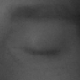

None
<PIL.Image.Image image mode=RGB size=80x80 at 0x7F7480277D00>


In [ ]:
# Verify image size
img = Image.fromarray(images[22])
print(img.format)
print(img.size)
print(img.mode)
print(img.show())
print(img)

In [ ]:
# Parse open/close labels in large dataset

# Initialize an empty list to store the labels
labels = []

# Loop through each subfolder in the directory
for subdir in sorted(os.listdir(root_dir)):
    subfolder_path = os.path.join(root_dir, subdir)
    # Check if the path is a directory
    if os.path.isdir(subfolder_path):
        # Loop through each file in the subfolder
        for file in sorted(os.listdir(subfolder_path)):
            # Check if the file is a PNG image
            if file.endswith('.png'):
                # Extract the open/close label from the file and append in to the list
                labels.append(int(file.split('_')[4]))

labels = np.asarray(labels)

In [ ]:
labels.shape

(84898,)

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(images, labels, test_size=0.2, train_size=0.8, shuffle=True)

Model training

In [ ]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2123/2123 [==============================] - 33s 9ms/step - loss: 0.3860 - accuracy: 0.8811 - val_loss: 0.1825 - val_accuracy: 0.9383
Epoch 2/10
2123/2123 [==============================] - 19s 9ms/step - loss: 0.1843 - accuracy: 0.9353 - val_loss: 0.1501 - val_accuracy: 0.9473
Epoch 3/10
2123/2123 [==============================] - 18s 8ms/step - loss: 0.1352 - accuracy: 0.9536 - val_loss: 0.1263 - val_accuracy: 0.9565
Epoch 4/10
2123/2123 [==============================] - 18s 8ms/step - loss: 0.1173 - accuracy: 0.9596 - val_loss: 0.1036 - val_accuracy: 0.9627
Epoch 5/10
2123/2123 [==============================] - 18s 8ms/step - loss: 0.0982 - accuracy: 0.9660 - val_loss: 0.0927 - val_accuracy: 0.9684
Epoch 6/10
2123/2123 [==============================] - 19s 9ms/step - loss: 0.0825 - accuracy: 0.9714 - val_loss: 0.0821 - val_accuracy: 0.9698
Epoch 7/10
2123/2123 [==============================] - 19s 9ms/step - loss: 0.0738 - accuracy: 0.9745 - val_loss: 0.1114 - val_accuracy: 0.9

Performance Assessment

531/531 - 2s - loss: 0.0699 - accuracy: 0.9769 - 2s/epoch - 3ms/step


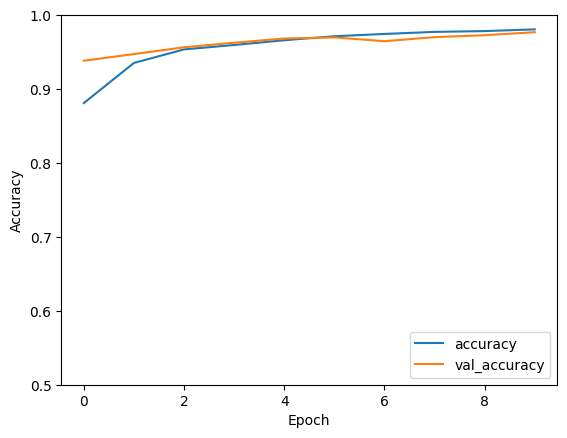

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
# Accuracy
print(test_acc)

0.9769139885902405


In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

531/531 [==============================] - 1s 2ms/step


In [ ]:
# Precision, Recall, F1 Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_binary)
print(precision)
print(recall)
print(f1_score)

[0.97231793 0.98143174]
[0.98094211 0.97302304]
[0.97661098 0.9772093 ]


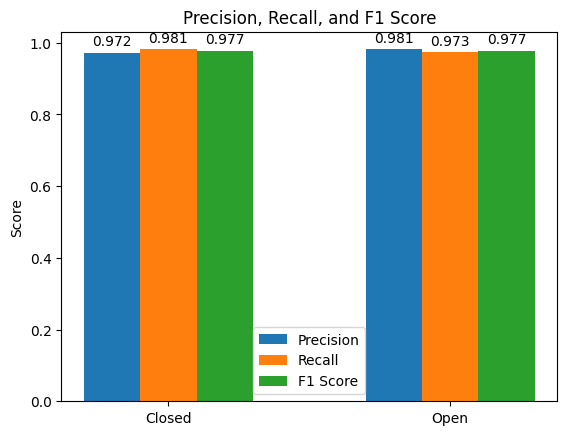

In [ ]:
# Create bar plot for precision, recall, and F1 score
labels = ['Closed', 'Open']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add labels, title, and legend to the plot
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add the actual scores as text on top of each bar
for rect1, rect2, rect3 in zip(rects1, rects2, rects3):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    height3 = rect3.get_height()
    ax.annotate('{:.3f}'.format(height1),
                xy=(rect1.get_x() + rect1.get_width() / 2, height1),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')
    ax.annotate('{:.3f}'.format(height2),
                xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')
    ax.annotate('{:.3f}'.format(height3),
                xy=(rect3.get_x() + rect3.get_width() / 2, height3),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

plt.show()

In [ ]:
model.save('drive/My Drive/Apply AI')